In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob         
import numpy as np
import seaborn as sb

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# lista de todos os arquivos
caged_files = sorted(glob('CAGEDMOV*.txt'))
# concatena os arquivos
pandemia_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [3]:
pandemia_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [4]:
caged_files

['CAGEDMOV202002.txt',
 'CAGEDMOV202003.txt',
 'CAGEDMOV202004.txt',
 'CAGEDMOV202005.txt',
 'CAGEDMOV202006.txt',
 'CAGEDMOV202007.txt',
 'CAGEDMOV202008.txt',
 'CAGEDMOV202009.txt',
 'CAGEDMOV202010.txt',
 'CAGEDMOV202011.txt',
 'CAGEDMOV202012.txt',
 'CAGEDMOV202101.txt',
 'CAGEDMOV202102.txt',
 'CAGEDMOV202103.txt']

In [5]:
parametro = 'graudeinstrução'
column_id_string = 'Nível '

In [6]:
questao01d_df = pandemia_df[['competência', 'saldomovimentação', parametro]]
questao01d_df[questao01d_df[parametro].isnull()]

,competência,saldomovimentação,graudeinstrução


In [7]:
saldomovimentacao = {
    1: 'admissao',
    -1: 'demissao'
}

parametro_dic = {
    1: 'Analfabeto',
    2: 'Até 5ª Incompleto',
    3: '5ª Completo Fundamental',
    4: '6ª a 9ª Fundamental',
    5: 'Fundamental Completo',
    6: 'Médio Incompleto',
    7: 'Médio Completo',
    8: 'Superior Incompleto',
    9: 'Superior Completo',
    10: 'Mestrado',
    11: 'Doutorado',
    12: 'Verificar 12',
    13: 'Verificar 1',
    80: 'Pós-Graduação completa',
    99: 'Não Identificado'
}

questao01d_df['saldomovimentação'] = questao01d_df['saldomovimentação'].apply(lambda x: saldomovimentacao[x])
# questao01d_df[parametro] = questao01d_df[parametro].apply(lambda x: parametro_dic[x])

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
questao01d_df.head()

,competência,saldomovimentação,graudeinstrução
0,202002,admissao,6
1,202002,admissao,4
2,202002,admissao,5
3,202002,admissao,9
4,202002,demissao,7


# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:


In [9]:
admissoes = questao01d_df['saldomovimentação'] == "admissao"
demissoes = questao01d_df['saldomovimentação'] == "demissao"

In [10]:
admissoes_df = questao01d_df[admissoes]
admissoes_df

,competência,saldomovimentação,graudeinstrução
0,202002,admissao,6
1,202002,admissao,4
2,202002,admissao,5
3,202002,admissao,9
5,202002,admissao,7
...,...,...,...
34776605,202103,admissao,7
34776611,202103,admissao,7
34776613,202103,admissao,7
34776615,202103,admissao,7


In [11]:
demissoes_df = questao01d_df[demissoes]
demissoes_df.head()

,competência,saldomovimentação,graudeinstrução
4,202002,demissao,7
7,202002,demissao,7
10,202002,demissao,6
12,202002,demissao,7
14,202002,demissao,7


In [12]:
# admissoes_df['idade_faixa'] = 
# admissoes_df[['competência','Faixa Etária']].value_counts().sort_index().sum()
# admissoes_df[admissoes_df['idade'].isnull()][['competência','idade']]
admissoes_df.head()

,competência,saldomovimentação,graudeinstrução
0,202002,admissao,6
1,202002,admissao,4
2,202002,admissao,5
3,202002,admissao,9
5,202002,admissao,7


## - Nível de Escolaridade

### Admissões

In [13]:
# cria pivot table para ter 'competencia' como index, e contar valores em 'idade'
admissoes_pivot = pd.pivot_table(admissoes_df, #[['competência','graudeinstrução']], 
                       columns=parametro, 
                       index='competência',
                       values=[parametro], 
                       aggfunc='count'
                      )
admissoes_pivot

saldomovimentação                                       \
graudeinstrução                1      2      3      4       5       6    
competência                                                              
202002                       6050  36092  26767  81224  126398  130464   
202003                       5142  30603  22199  67660  105709  101650   
202004                       3195  16603  13983  33911   53220   41532   
202005                       4448  24141  17478  40654   60021   49433   
202006                       5038  30337  20809  51132   75924   63957   
202007                       5366  30123  20456  57498   87761   78288   
202008                       6457  32912  22181  61728   96623   92442   
202009                       8816  39438  24016  66631  104941  108284   
202010                       5315  30302  22991  70176  114284  123050   
202011                       4928  25925  20125  65231  107766  119727   
202012                       3975  19221  14799  48404   84037   92137   
202101                       5676  30761  26334  75213  119164  118994   
202102                       6185  33481  25535  81162  132704  139199   
202103                       6144  32893  24940  76295  122687  124551   

                                                            
graudeinstrução       7      8       9     10    11     80  
competência                                                 
202002            932142  67188  175890  7714  2702  16798  
202003            781307  55206  129659  3481  1134  12905  
202004            349571  19620   59162  1003   381   6415  
202005            414240  23885   62273   977   396   5975  
202006            531845  33259   74397  1094   471   7197  
202007            622770  42712   88217  1388   546   8525  
202008            752110  52853  105709  3563  1495  11405  
202009            839384  60871  112790  2262   809  11267  
202010            973815  69714  123895  2087   766  12233  
202011            985751  68981  119731  1718   654  11652  
202012            807911  56354  100784  1258   521   9879  
202101            925881  67756  140445  2302   789  13768  
202102           1015682  71031  165033  5206  1936  17450  
202103            963745  68969  163914  3922  1364  18583

In [14]:
# admissoes_pivot.columns.name = None
admissoes_pivot

saldomovimentação                                       \
graudeinstrução                1      2      3      4       5       6    
competência                                                              
202002                       6050  36092  26767  81224  126398  130464   
202003                       5142  30603  22199  67660  105709  101650   
202004                       3195  16603  13983  33911   53220   41532   
202005                       4448  24141  17478  40654   60021   49433   
202006                       5038  30337  20809  51132   75924   63957   
202007                       5366  30123  20456  57498   87761   78288   
202008                       6457  32912  22181  61728   96623   92442   
202009                       8816  39438  24016  66631  104941  108284   
202010                       5315  30302  22991  70176  114284  123050   
202011                       4928  25925  20125  65231  107766  119727   
202012                       3975  19221  14799  48404   84037   92137   
202101                       5676  30761  26334  75213  119164  118994   
202102                       6185  33481  25535  81162  132704  139199   
202103                       6144  32893  24940  76295  122687  124551   

                                                            
graudeinstrução       7      8       9     10    11     80  
competência                                                 
202002            932142  67188  175890  7714  2702  16798  
202003            781307  55206  129659  3481  1134  12905  
202004            349571  19620   59162  1003   381   6415  
202005            414240  23885   62273   977   396   5975  
202006            531845  33259   74397  1094   471   7197  
202007            622770  42712   88217  1388   546   8525  
202008            752110  52853  105709  3563  1495  11405  
202009            839384  60871  112790  2262   809  11267  
202010            973815  69714  123895  2087   766  12233  
202011            985751  68981  119731  1718   654  11652  
202012            807911  56354  100784  1258   521   9879  
202101            925881  67756  140445  2302   789  13768  
202102           1015682  71031  165033  5206  1936  17450  
202103            963745  68969  163914  3922  1364  18583

In [15]:
# converte indice para string para pontuar no eixo y
admissoes_pivot.index = admissoes_pivot.index.map(str)

In [16]:
# cria DF a partir da pivot table
admissoes_pivot_df = pd.DataFrame(admissoes_pivot.to_records(), 
                  index=admissoes_pivot.index
)
# elimina coluna adicional que foi utilizada como índice
admissoes_pivot_df.drop(['competência'], axis=1, inplace=True)
# limpa nome das colunas
admissoes_pivot_df.columns = [
    parametro_dic[int(hdr.replace("('", "")
    .replace("saldomovimentação", "")
    .replace("',", "")
    .replace(")", ""))]
    for hdr in admissoes_pivot_df.columns]
admissoes_pivot_df

,Analfabeto,Até 5ª Incompleto,5ª Completo Fundamental,6ª a 9ª Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Pós-Graduação completa
competência,,,,,,,,,,,,
202002,6050,36092,26767,81224,126398,130464,932142,67188,175890,7714,2702,16798
202003,5142,30603,22199,67660,105709,101650,781307,55206,129659,3481,1134,12905
202004,3195,16603,13983,33911,53220,41532,349571,19620,59162,1003,381,6415
202005,4448,24141,17478,40654,60021,49433,414240,23885,62273,977,396,5975
202006,5038,30337,20809,51132,75924,63957,531845,33259,74397,1094,471,7197
202007,5366,30123,20456,57498,87761,78288,622770,42712,88217,1388,546,8525
202008,6457,32912,22181,61728,96623,92442,752110,52853,105709,3563,1495,11405
202009,8816,39438,24016,66631,104941,108284,839384,60871,112790,2262,809,11267
202010,5315,30302,22991,70176,114284,123050,973815,69714,123895,2087,766,12233


In [17]:
# cria coluna Total para receber o total por competencia
admissoes_pivot_df["Total"] = 0
for index in admissoes_pivot_df.index:
    admissoes_pivot_df["Total"][str(index)] = admissoes_pivot_df.sum(axis=1)[str(index)]
    

In [18]:
admissoes_pivot_df.columns

Index(['Analfabeto', 'Até 5ª Incompleto', '5ª Completo Fundamental',
       '6ª a 9ª Fundamental', 'Fundamental Completo', 'Médio Incompleto',
       'Médio Completo', 'Superior Incompleto', 'Superior Completo',
       'Mestrado', 'Doutorado', 'Pós-Graduação completa', 'Total'],
      dtype='object')

In [19]:
admissoes_pivot_df.head()

,Analfabeto,Até 5ª Incompleto,5ª Completo Fundamental,6ª a 9ª Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Pós-Graduação completa,Total
competência,,,,,,,,,,,,,
202002,6050,36092,26767,81224,126398,130464,932142,67188,175890,7714,2702,16798,1609429
202003,5142,30603,22199,67660,105709,101650,781307,55206,129659,3481,1134,12905,1316655
202004,3195,16603,13983,33911,53220,41532,349571,19620,59162,1003,381,6415,598596
202005,4448,24141,17478,40654,60021,49433,414240,23885,62273,977,396,5975,703921
202006,5038,30337,20809,51132,75924,63957,531845,33259,74397,1094,471,7197,895460


In [20]:
26334+75213+5676+30761+789+119164+2302+925881+118994+13768+140445+67756

1527083

In [21]:
25535+81162+6185+33481+1936+132704+5206+1015682+139199+17450+165033+71031

1694604

In [22]:
# cria colunas adicionais para calculo de percentagem
for column in admissoes_pivot_df.columns:
    if column != "Total":
        new_column = str("Índice " + column )
#         df.drop([new_column], axis=1, inplace=True)
        admissoes_pivot_df[new_column] = round(admissoes_pivot_df[column] /  admissoes_pivot_df["Total"] * 100,2)

In [23]:
colunas_grafico = [column for column in admissoes_pivot_df.columns if 'Índice ' in column] 
admissoes_pivot_df[colunas_grafico]

,Índice Analfabeto,Índice Até 5ª Incompleto,Índice 5ª Completo Fundamental,Índice 6ª a 9ª Fundamental,Índice Fundamental Completo,Índice Médio Incompleto,Índice Médio Completo,Índice Superior Incompleto,Índice Superior Completo,Índice Mestrado,Índice Doutorado,Índice Pós-Graduação completa
competência,,,,,,,,,,,,
202002,0.38,2.24,1.66,5.05,7.85,8.11,57.92,4.17,10.93,0.48,0.17,1.04
202003,0.39,2.32,1.69,5.14,8.03,7.72,59.34,4.19,9.85,0.26,0.09,0.98
202004,0.53,2.77,2.34,5.67,8.89,6.94,58.40,3.28,9.88,0.17,0.06,1.07
202005,0.63,3.43,2.48,5.78,8.53,7.02,58.85,3.39,8.85,0.14,0.06,0.85
202006,0.56,3.39,2.32,5.71,8.48,7.14,59.39,3.71,8.31,0.12,0.05,0.80
202007,0.51,2.89,1.96,5.51,8.41,7.50,59.67,4.09,8.45,0.13,0.05,0.82
202008,0.52,2.66,1.79,4.98,7.80,7.46,60.68,4.26,8.53,0.29,0.12,0.92
202009,0.64,2.86,1.74,4.83,7.61,7.85,60.85,4.41,8.18,0.16,0.06,0.82
202010,0.34,1.96,1.48,4.53,7.38,7.95,62.88,4.50,8.00,0.13,0.05,0.79


### Visual

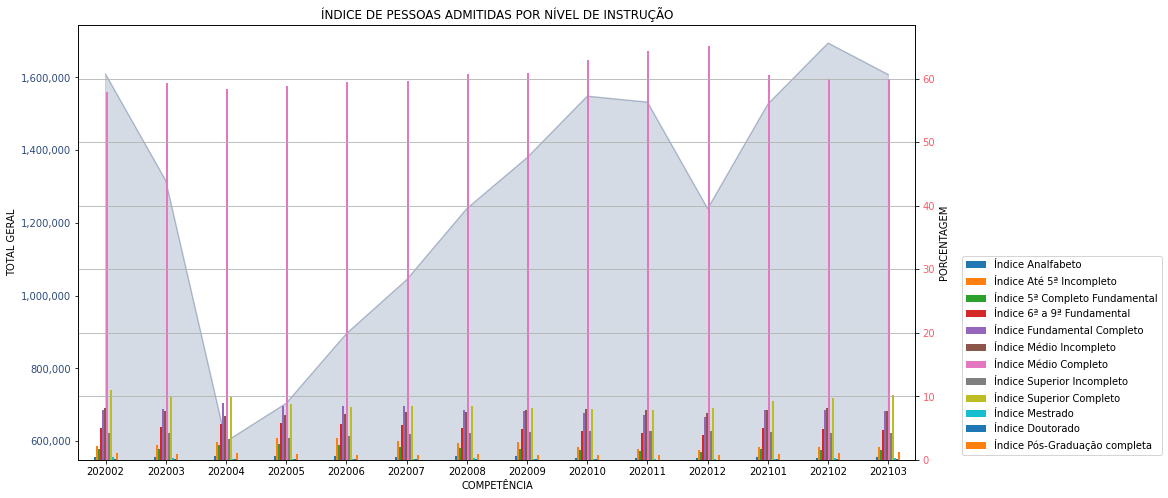

In [24]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS ADMITIDAS POR NÍVEL DE INSTRUÇÃO')
ax1 = admissoes_pivot_df[
    'Total'].plot(kind='area',
                  alpha=0.2,
                  color=ax1_color,
                  figsize = (15,8),
                  ylim=[admissoes_pivot_df['Total'].min()-50000, admissoes_pivot_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
admissoes_pivot_df[colunas_grafico].plot.bar(
         width= 0.4,
        grid = True,
#         stacked=True,
        ylabel='PORCENTAGEM',
#         logy=True,
         ax=ax2
    ).legend(
    bbox_to_anchor=(1.3, 0), loc='lower right')

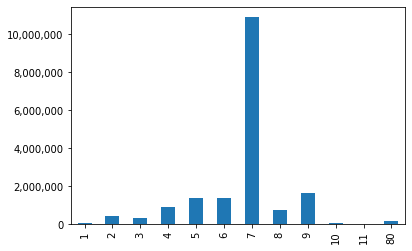

In [25]:
admissoes_df[parametro].value_counts().sort_index().plot.bar(stacked=True).get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

# colunas_grafico = [column for column in admissoes_pivot_df.columns if 'Índice ' not in column] 
# admissoes_pivot_df[colunas_grafico]['Analfabeto'].sum() / admissoes_pivot_df[colunas_grafico]['Total'].sum()

# admissoes_pivot_df.sum()
# .plot.pie(
#     autopct='%1.1f%%',
#     explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
#     title='ÍNDICE DE PESSOAS ADMITIDAS POR FAIXA ETÁRIA',
#     ylabel= 'Período de Pandemia'
# )

In [26]:
13768 + 17450 + 18583 

49801

In [27]:
1527083 + 1694604 + 1608007 

4829694

### Demissões

In [28]:
#cria pivot table para ter 'competencia' como index, e contar valores em 'idade'
demissoes_pivot = pd.pivot_table(demissoes_df, 
                       columns=parametro, 
                       index='competência',
                       values=[parametro], 
                       aggfunc='count'
                      )
demissoes_pivot

saldomovimentação                                       \
graudeinstrução                1        2        3        4         5    
competência                                                              
202002                     8408.0  43502.0  29509.0  74211.0  113823.0   
202003                     7867.0  43363.0  31311.0  81685.0  131478.0   
202004                     5681.0  36383.0  30957.0  83669.0  132715.0   
202005                     4427.0  29574.0  23708.0  64609.0   97952.0   
202006                     3832.0  24926.0  19676.0  53790.0   83791.0   
202007                     3581.0  23914.0  20043.0  51047.0   80833.0   
202008                     3870.0  25947.0  20565.0  55322.0   85062.0   
202009                     4300.0  26671.0  21067.0  58935.0   92362.0   
202010                     4371.0  28981.0  22781.0  62788.0   98104.0   
202011                     4444.0  28790.0  23477.0  63209.0   96049.0   
202012                     5336.0  30944.0  24330.0  66991.0  103912.0   
202101                     5478.0  29174.0  21633.0  60544.0   98752.0   
202102                     6509.0  34018.0  23666.0  66011.0  104023.0   
202103                     7522.0  38998.0  30836.0  75382.0  118583.0   

                                                                             \
graudeinstrução        6         7        8         9       10      11   12   
competência                                                                   
202002           111438.0  794141.0  59140.0  132779.0  3259.0  1225.0  NaN   
202003           122491.0  904996.0  61150.0  126121.0  2192.0   832.0  NaN   
202004           119065.0  868679.0  55663.0  115203.0  1431.0   567.0  NaN   
202005            86028.0  591095.0  38762.0   89551.0  1496.0   563.0  NaN   
202006            73790.0  514952.0  34017.0   83935.0  3293.0  1474.0  2.0   
202007            73733.0  516280.0  36557.0   90656.0  3969.0  1375.0  NaN   
202008            78834.0  569766.0  40378.0   96176.0  2796.0  1091.0  NaN   
202009            86644.0  620561.0  44122.0   98659.0  1858.0   707.0  NaN   
202010            92779.0  676966.0  48950.0  105349.0  1538.0   605.0  NaN   
202011            91121.0  653697.0  47163.0   97550.0  1523.0   549.0  NaN   
202012           107541.0  756927.0  52965.0  136015.0  5546.0  2047.0  NaN   
202101            99156.0  764545.0  54548.0  117511.0  2498.0  1046.0  NaN   
202102           102598.0  756707.0  56450.0  125121.0  3133.0  1098.0  NaN   
202103           111712.0  833222.0  58817.0  131060.0  2469.0   898.0  NaN   

                               
graudeinstrução   13       80  
competência                    
202002           NaN  12580.0  
202003           3.0  10567.0  
202004           1.0   9085.0  
202005           4.0   8053.0  
202006           9.0   8957.0  
202007           NaN  10652.0  
202008           NaN  10283.0  
202009           NaN  10059.0  
202010           NaN  10427.0  
202011           NaN  10061.0  
202012           NaN  14632.0  
202101           NaN  11845.0  
202102           NaN  13631.0  
202103           NaN  14368.0

In [29]:
# converte indice para string para pontuar no eixo y
demissoes_pivot.index = demissoes_pivot.index.map(str)

In [30]:
# cria DF a partir da pivot table
demissoes_pivot_df = pd.DataFrame(demissoes_pivot.to_records(), 
                  index=demissoes_pivot.index
)
# elimina coluna adicional que foi utilizada como índice
demissoes_pivot_df.drop(['competência'], axis=1, inplace=True)
# limpa nome das colunas
demissoes_pivot_df.columns = [
    parametro_dic[int(hdr.replace("('", "")
    .replace("saldomovimentação", "")
    .replace("',", "")
    .replace(")", ""))]
    for hdr in demissoes_pivot_df.columns]
demissoes_pivot_df

,Analfabeto,Até 5ª Incompleto,5ª Completo Fundamental,6ª a 9ª Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Verificar 12,Verificar 1,Pós-Graduação completa
competência,,,,,,,,,,,,,,
202002,8408.0,43502.0,29509.0,74211.0,113823.0,111438.0,794141.0,59140.0,132779.0,3259.0,1225.0,NaN,NaN,12580.0
202003,7867.0,43363.0,31311.0,81685.0,131478.0,122491.0,904996.0,61150.0,126121.0,2192.0,832.0,NaN,3.0,10567.0
202004,5681.0,36383.0,30957.0,83669.0,132715.0,119065.0,868679.0,55663.0,115203.0,1431.0,567.0,NaN,1.0,9085.0
202005,4427.0,29574.0,23708.0,64609.0,97952.0,86028.0,591095.0,38762.0,89551.0,1496.0,563.0,NaN,4.0,8053.0
202006,3832.0,24926.0,19676.0,53790.0,83791.0,73790.0,514952.0,34017.0,83935.0,3293.0,1474.0,2.0,9.0,8957.0
202007,3581.0,23914.0,20043.0,51047.0,80833.0,73733.0,516280.0,36557.0,90656.0,3969.0,1375.0,NaN,NaN,10652.0
202008,3870.0,25947.0,20565.0,55322.0,85062.0,78834.0,569766.0,40378.0,96176.0,2796.0,1091.0,NaN,NaN,10283.0
202009,4300.0,26671.0,21067.0,58935.0,92362.0,86644.0,620561.0,44122.0,98659.0,1858.0,707.0,NaN,NaN,10059.0
202010,4371.0,28981.0,22781.0,62788.0,98104.0,92779.0,676966.0,48950.0,105349.0,1538.0,605.0,NaN,NaN,10427.0


In [31]:
# cria coluna Total para receber o total por competencia
demissoes_pivot_df["Total"] = 0
for index in demissoes_pivot_df.index:
    demissoes_pivot_df["Total"][str(index)] = demissoes_pivot_df.sum(axis=1)[str(index)]
    

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
demissoes_pivot_df.columns

Index(['Analfabeto', 'Até 5ª Incompleto', '5ª Completo Fundamental',
       '6ª a 9ª Fundamental', 'Fundamental Completo', 'Médio Incompleto',
       'Médio Completo', 'Superior Incompleto', 'Superior Completo',
       'Mestrado', 'Doutorado', 'Verificar 12', 'Verificar 1',
       'Pós-Graduação completa', 'Total'],
      dtype='object')

In [33]:
column_id_string = 'Nível '
for column in demissoes_pivot_df.columns:
    if column not in["Total", "Não informado"]:
        new_column = str(column_id_string + column )
#         df.drop([new_column], axis=1, inplace=True)
        demissoes_pivot_df[new_column] = round(demissoes_pivot_df[column] /  demissoes_pivot_df["Total"] * 100,2)

In [34]:
colunas_grafico_dem = [column for column in demissoes_pivot_df.columns if column_id_string in column] 
demissoes_pivot_df[colunas_grafico_dem]

,Nível Analfabeto,Nível Até 5ª Incompleto,Nível 5ª Completo Fundamental,Nível 6ª a 9ª Fundamental,Nível Fundamental Completo,Nível Médio Incompleto,Nível Médio Completo,Nível Superior Incompleto,Nível Superior Completo,Nível Mestrado,Nível Doutorado,Nível Verificar 12,Nível Verificar 1,Nível Pós-Graduação completa
competência,,,,,,,,,,,,,,
202002,0.61,3.14,2.13,5.36,8.22,8.05,57.38,4.27,9.59,0.24,0.09,NaN,NaN,0.91
202003,0.52,2.85,2.05,5.36,8.63,8.04,59.38,4.01,8.28,0.14,0.05,NaN,0.0,0.69
202004,0.39,2.49,2.12,5.73,9.10,8.16,59.54,3.81,7.90,0.10,0.04,NaN,0.0,0.62
202005,0.43,2.86,2.29,6.24,9.46,8.31,57.07,3.74,8.65,0.14,0.05,NaN,0.0,0.78
202006,0.42,2.75,2.17,5.93,9.24,8.14,56.81,3.75,9.26,0.36,0.16,0.0,0.0,0.99
202007,0.39,2.62,2.20,5.59,8.86,8.08,56.57,4.01,9.93,0.43,0.15,NaN,NaN,1.17
202008,0.39,2.62,2.08,5.59,8.59,7.96,57.55,4.08,9.71,0.28,0.11,NaN,NaN,1.04
202009,0.40,2.50,1.98,5.53,8.66,8.13,58.22,4.14,9.26,0.17,0.07,NaN,NaN,0.94
202010,0.38,2.51,1.97,5.44,8.50,8.04,58.68,4.24,9.13,0.13,0.05,NaN,NaN,0.90


### Visual

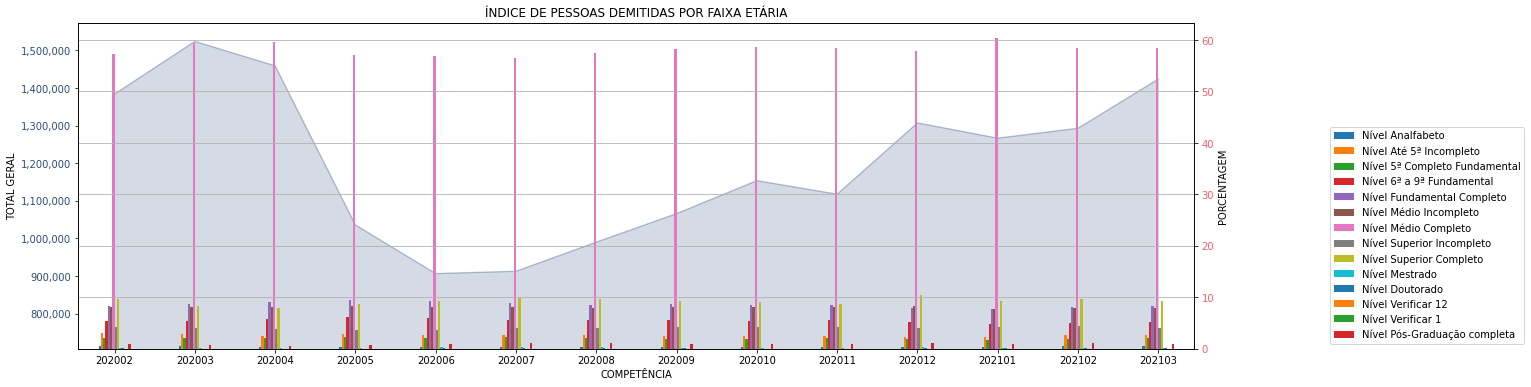

In [37]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS DEMITIDAS POR FAIXA ETÁRIA')
ax1 = demissoes_pivot_df[
    'Total'].plot(kind='area',
                  alpha=0.2,
                  color=ax1_color,
                  figsize = (20,6),
                  ylim=[demissoes_pivot_df['Total'].min()-200000, demissoes_pivot_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
demissoes_pivot_df[colunas_grafico_dem].plot.bar(
         width= 0.4,
        grid = True,
#         stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2
    ).legend(
    bbox_to_anchor=(1.3, 0), loc='lower right')


In [36]:
# demissoes_pivot_df.sum()[-7:].plot.pie(
#     autopct='%1.1f%%',
#     explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
#     title='ÍNDICE DE PESSOAS DEMITIDAS POR FAIXA ETÁRIA',
#     ylabel= 'Período de Pandemia'
# )